# **ATIVIDADE DE IMPLEMENTAÇÃO 11**

**Simbiose das Anêmonas e peixes-palhaço**

**Primeira iteração:**

Sistema em que peixes-palhaço e anêmonas não tem qualquer influência entre si.

<img src="Modelo1.png"/, width=400, height=400 style="float: center; margin: 0px 0px 10px 10px"> 

Para esse caso, escrevemos o seguinte conjunto de equações a diferenças:
$P(t+1)=P(t)+(p_n-p_m )P(t)$

$A(t+1)=A(t)+(a_n-a_m )A(t)$

Podemos reescrever essas equações em termos de $∆P$ e $∆A$, que representam as variações nas populações $P$ e $A$, respectivamente.

$P(t+1)=P(t)+∆P$

$∆P(P)=(p_n-p_m )P$  

$A(t+1)=A(t)+∆A$

$∆A(A)=(a_n-a_m )A$

Na célula abaixo, implemente a função CalculaDeltaP


In [135]:
'''
A função CalculaDeltaP calcula a variação na população de peixes-palhaço.
Entradas
    P: população atual de peixes-palhaço
    pn: taxa de natalidade de peixes-palhaço (unidade: peixes / peixe / mês)
    pm: taxa de mortalidade de peixes-palhaço (unidade: peixes / peixe / mês)
Saídas
    deltaP: variação da população de peixes-palhaço para o próximo mês
'''

def CalculaDeltaP(P,pn,pm):
    # coloque seu código aqui
        return (pn - pm)*P
    

In [136]:
'''
A função CalculaDeltaA calcula a variação na população de Anêmonas.
Entradas
    A: população atual de Anêmonas
    an: taxa de natalidade de anêmonas (unidade: anêmonas / anêmonas / mês)
    am: taxa de mortalidade de anêmonas (unidade: anêmonas / anêmonas / mês)
Saídas
    deltaA: variação da população de anêmonas para o próximo mês
'''

def CalculaDeltaA(A,an,am):
    # coloque seu código aqui
    return (an - am)*A
    

In [137]:
'''
Teste parcial 1.1
Código para testar a função CalculaDeltaP a partir de uma única chamada 
Saída esperada: 0.5000
'''
Resposta=CalculaDeltaP(5,0.3,0.2)
print('Saída esperada: 0.5000')
print('Saída calculada: ' + str(Resposta))



Saída esperada: 0.5000
Saída calculada: 0.4999999999999999


In [138]:
'''
Código para testar a função CalculaDeltaA a partir de uma única chamada 
Saída esperada: 0.5000
'''
Resposta=CalculaDeltaA(5,0.3,0.2)
print('Saída esperada: 0.5000')
print('Saída calculada: ' + str(Resposta))

Saída esperada: 0.5000
Saída calculada: 0.4999999999999999


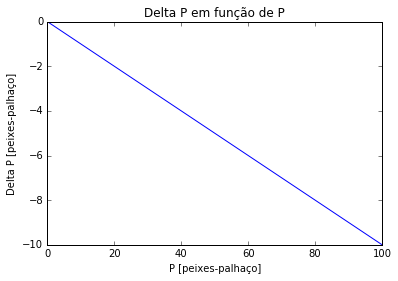

In [139]:
'''
Teste parcial 1.2
Código para construir um gráfico do valor de ∆P calculado pela função CalculaDeltaP em função de diferentes valores de P.
Entradas:
    pn = 0.2
    pm = 0.3
    P variando conforme indicado: (0, 20, 40, 60, 80, 100) 
Saída esperada: um gráfico de uma reta com coeficiente angular 0.1, interceptando o eixo y em y = 0.
'''
import matplotlib.pyplot as plt
%matplotlib inline

pn = 0.2
pm = 0.3
P = [0] * 6
DeltaP = [0] * 6
for i in range (0,6):
    P[i] = 20*i
    DeltaP[i] = CalculaDeltaP(P[i],pn,pm)
plt.plot(P, DeltaP)
plt.axis([0, P[5], -10, 0])
plt.ylabel('Delta P [peixes-palhaço]')
plt.xlabel('P [peixes-palhaço]')
plt.title(r'Delta P em função de P')
plt.show()


**JUNTANDO AS PEÇAS (I)**

Crie um código abaixo que gere os gráficos das populações de peixes-palhaço e anêmonas em função do tempo usando as funções CalculaDeltaP e CalculaDeltaA

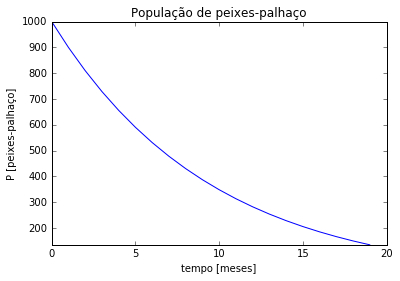

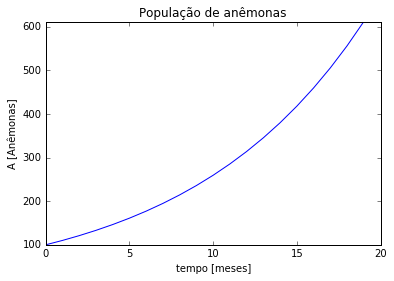

In [140]:
import matplotlib.pyplot as plt
%matplotlib inline

P = [0]*20
A = [0]*20
T =20

for i in range (0, T):
    P[0] = 1000
    A[0] = 100
    DeltaP = CalculaDeltaP(P[i-1], 0.2, 0.3)
    P[i] = P[i - 1] + DeltaP
    
    DeltaA = CalculaDeltaA(A[i -1], 0.4, 0.3)
    A[i] = A[i -1] + DeltaA

tempo = range(0, T)
plt.plot(tempo, P)
plt.axis([0, T, min(P), max(P)])
plt.ylabel('P [peixes-palhaço]')
plt.xlabel('tempo [meses]')
plt.title(r'População de peixes-palhaço')
plt.show()

tempo = range(0, T)
plt.plot(tempo, A)
plt.axis([0, T, min(A), max(A)])
plt.ylabel('A [Anêmonas]')
plt.xlabel('tempo [meses]')
plt.title(r'População de anêmonas')
plt.show()



    

**Segunda iteração:**

Sistema em que peixes-palhaço e anêmonas com influência entre si.

<img src="Modelo2.png"/, width=400, height=400 style="float: center; margin: 0px 0px 10px 10px"> 

As equações a diferenças desse modelo são:

$P(t+1)=P(t)+∆P(P(t),A(t))$

$∆P(P,A)=(p_n+p_{n,a}A)P-p_mP$

$A(t+1)=A(t)+∆A(A(t))$

$∆A(A)=(a_n-a_m )A$


In [141]:
'''
A função CalculaDeltaP_Simb calcula a variação na população de peixes-palhaço no modelo 2.
Entradas
    P: população atual de peixes-palhaço
    A: população atual de anêmonas
    pn: taxa de natalidade de peixes-palhaço (unidade: peixes / peixe / mês)
    pm: taxa de mortalidade de peixes-palhaço (unidade: peixes / peixe / mês)
    pna: taxa de facilitação da reprodução dos peixes pela presença das anêmonas (unidade: peixes / peixe.anemona.mês)
Saídas
    deltaP: variação da população de peixes-palhaço para o próximo mês
'''

def CalculaDeltaP_Simb(P,A, pn,pm, pan):
    #escreva seu código aqui
    DeltaP = (pn + (0.00025*A))*P - pm*P
    return DeltaP
    
    

In [142]:
'''
Teste parcial 2.1
Este código testa a função CalculaDeltaP_Simb para diferentes níveis da população de anêmonas. 
Saída esperada:
    Resposta 1 = 0.5000
    Resposta 2 = 1.1250
    Resposta 3 = 3.0000
'''

Resposta1 = CalculaDeltaP_Simb(5, 0, 0.3, 0.2, 0.00025)
Resposta2 = CalculaDeltaP_Simb(5, 500, 0.3, 0.2, 0.00025)
Resposta3 = CalculaDeltaP_Simb(5, 2000, 0.3, 0.2, 0.00025)
print('Saída esperada: 0.5000')
print('Saída calculada: ' + str(Resposta1))
print('Saída esperada: 1.1250')
print('Saída calculada: ' + str(Resposta2))
print('Saída esperada: 3.0000')
print('Saída calculada: ' + str(Resposta3))


Saída esperada: 0.5000
Saída calculada: 0.5
Saída esperada: 1.1250
Saída calculada: 1.125
Saída esperada: 3.0000
Saída calculada: 3.0


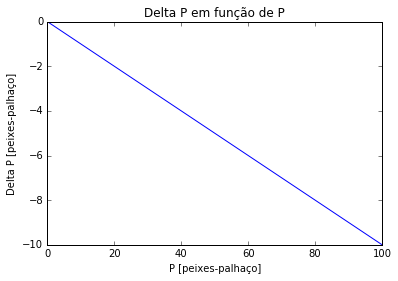

In [143]:
'''
Teste parcial 2.2
Este código é para construir um gráfico de DeltaP por P usando a nova função CalculaDeltaP_Simb. 
Para isso, serão usados diferentes dados de populações de anêmonas. 
Saída esperada: relações lineares diferentes entre DeltaP e P, dependendo da população de anêmonas
'''
import matplotlib.pyplot as plt
%matplotlib inline

pn = 0.5
pm = 0.6
P0 = [0] * 6
DeltaP0 = [0] * 6
for i in range (0,6):
    P0[i] = 20*i
    DeltaP0[i] = CalculaDeltaP_Simb(P0[i], 0, 0.5, 0.6, 0.00025)
plt.plot(P0, DeltaP0)
plt.axis([0,100,-10,0]) 
plt.ylabel('Delta P [peixes-palhaço]')
plt.xlabel('P [peixes-palhaço]')
plt.title(r'Delta P em função de P')
plt.show()





**JUNTANDO AS PEÇAS (II)**

Adapte o código de forma que ele possa gerar os gráficos das séries temporais das duas populações para a nova versão do modelo, com simbiose.

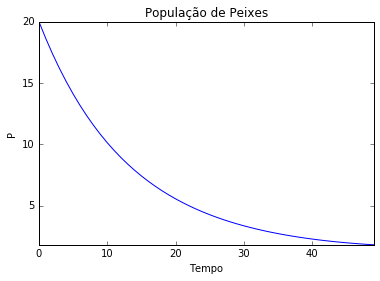

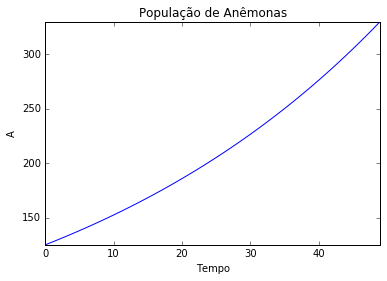

In [150]:
import matplotlib.pyplot as plt
%matplotlib inline

T = 50
P = [0]*50
A = [0]*50
A[0] = 125
P[0] = 20

for i in range(1,T):
    A[i] = A[i -1] + CalculaDeltaA(A[i -1], 0.82,0.8)
    P[i] = P[i -1] + CalculaDeltaP_Simb(P[i - 1], A[ i -1], 0.5, 0.6, 0.00025)
   


tempo = list(range(50)) 
plt.plot(tempo, P)
plt.axis([0 , max(tempo) , min(P)  , max(P)])
plt.ylabel('P')
plt.xlabel('Tempo')  
plt.title(r'População de Peixes')
plt.show()    
 
plt.plot(tempo, A)
plt.axis([0 , max(tempo) , min(A)  , max(A)])
plt.ylabel('A')
plt.xlabel('Tempo')  
plt.title(r'População de Anêmonas')
plt.show()    


**Terceira iteração:**

Para a última versão de nosso modelo, vamos acrescentar o efeito que os peixes-palhaço têm sobre a população de anêmonas. Deixaremos para você pensar, como exercício, na construção do diagrama de estoques e fluxos para esta nova situação (é bastante similar ao passo anterior, em que acrescentamos o efeito das anêmonas na reprodução dos peixes-palhaço). As equações a diferenças para o nosso novo modelo são as seguintes:

$P(t+1)=P(t)+∆P(P(t),A(t))$

$∆P(P,A)=(p_n+p_{n,a}A)P-p_mP$

$A(t+1)=A(t)+∆A(A(t),P(t))$

$∆A(A,P)=(a_n+a_{n,p}P)A-a_mA$


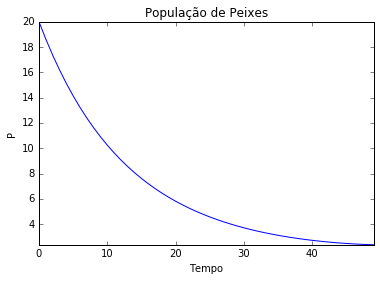

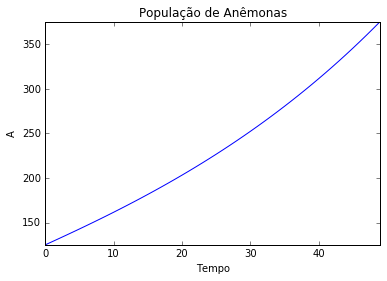

In [152]:
import matplotlib.pyplot as plt
%matplotlib inline

def CalculaDeltaA_Simb(A,P, an,am, pna):   
    DeltaA = (an + (0.0004*P))*A - am*A
    return DeltaA


T = 50
P = [0]*50
A = [0]*50
A[0] = 125
P[0] = 20

for i in range(1,T):
    A[i] = A[i -1] + CalculaDeltaA_Simb(A[i - 1], P[i - 1], 0.82,0.8, 0.004)
    P[i] = P[i -1] + CalculaDeltaP_Simb(P[i - 1], A[i - 1], 0.5, 0.6, 0.00025)


   
tempo = list(range(50)) 
plt.plot(tempo, P)
plt.axis([0 , max(tempo) , min(P)  , max(P)])
plt.ylabel('P')
plt.xlabel('Tempo')  
plt.title(r'População de Peixes')
plt.show()    
 
plt.plot(tempo, A)
plt.axis([0 , max(tempo) , min(A)  , max(A)])
plt.ylabel('A')
plt.xlabel('Tempo')  
plt.title(r'População de Anêmonas')
plt.show()
    
    
    
   
   

INDO UM POUCO ALÉM – CRIAÇÃO DE GRÁFICOS QUE RESUMEM DIFERENTES SÉRIES TEMPORAIS

In [ ]:
'''
Esta função calcula as séries temporais das populações de peixes-palhaço e anêmonas.
Entradas
    T: o número de instantes de tempo para o qual você vai rodar a simulação
    Po: a população inicial de peixes-palhaço
    Ao: a população inicial de anêmonas
    pn: taxa de natalidade de peixes-palhaço (unidade: peixes / peixe / mês)
    pm: taxa de mortalidade de peixes-palhaço (unidade: peixes / peixe / mês)
    pna: taxa de facilitação da reprodução de peixes-palhaço pela presença de anêmonas (unidade: 
         peixes / peixe / anêmona.mês) 
    an: taxa de natalidade de anêmonas (unidade: anêmonas / anêmona / mês)
    am: taxa de mortalidade de peixes-palhaço (unidade: peixes / peixe / mês)
    anp: taxa de facilitação da reprodução de anêmonas pela presença de peixes-palhaço (unidade: 
         anêmonas / anêmona / peixe.mês)
Saídas
    P: a população de peixes-palhaço a cada mês
    A: a população de anêmonas a cada mês
'''
def CalculaSeriesTemporais(T, Po, Ao, pn, pm, pan, an, am, anp):
    # escreva seu código aqui


In [ ]:
# faça o código para chamada da função CalculaSeriesTemporais aqui
    
